[pyDSA](https://github.com/gabylaunay/pyDSA) is a python3 package for Drop Shape Analysis.

## Installing pyDSA

### Dependencies
You will first need to install [IMTreatment](https://framagit.org/gabylaunay/IMTreatment) by downloading the package [here](https://framagit.org/gabylaunay/IMTreatment/repository/master/archive.zip), extracting it and installing it with:
```bash
python3 setup.py install
```

pyDSA also use [OpenCV](https://opencv.org) for edge detection, so you will need it installed as well.

### Install pyDSA
Download the sources [here](https://github.com/gabylaunay/pyDSA/archive/master.zip), extract, and install them:

```bash
python3 setup.py install
```

pyDSA have some dependencies (matplotlib, scipy, numpy, ...) that should be installed automatically.



## Importing an image

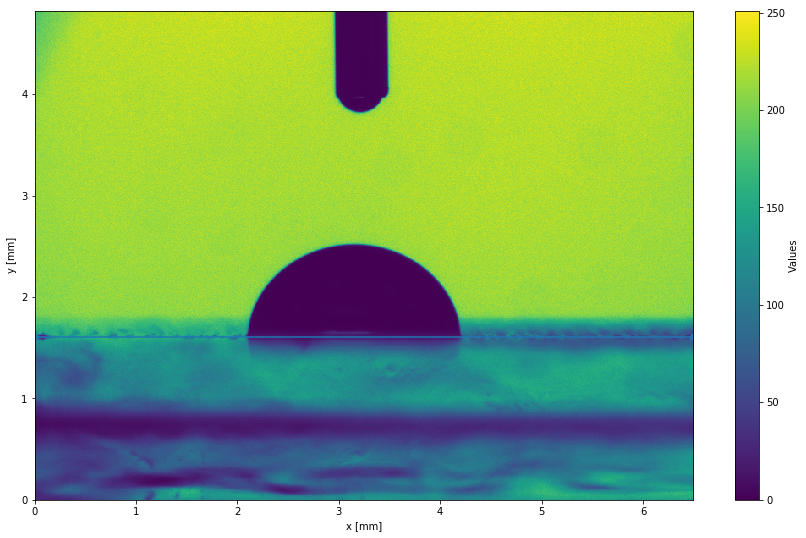

In [12]:
import pyDSA as dsa
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 15, 9

# Import an image
im = dsa.import_from_image('data/image.bmp', dx=1/120, dy=1/120, unit_x='mm', unit_y='mm')

# Display it
plt.figure()
im.display()
plt.show()

## Scaling
Here we scaled the image during the import (using the `dx` and `dy` parameters),
but you can also scale the image afterwards, using the `im.scale_interactive()` interactive function.

This function ask you to select two points on the image and to input the real distance (in mm for example) separating them.
It then scale the image accordingly.

The scaling is then stored in an `.info` file alongside the image, and will be automatically imported the next time you want to work with this image.

## Focusing on the drop

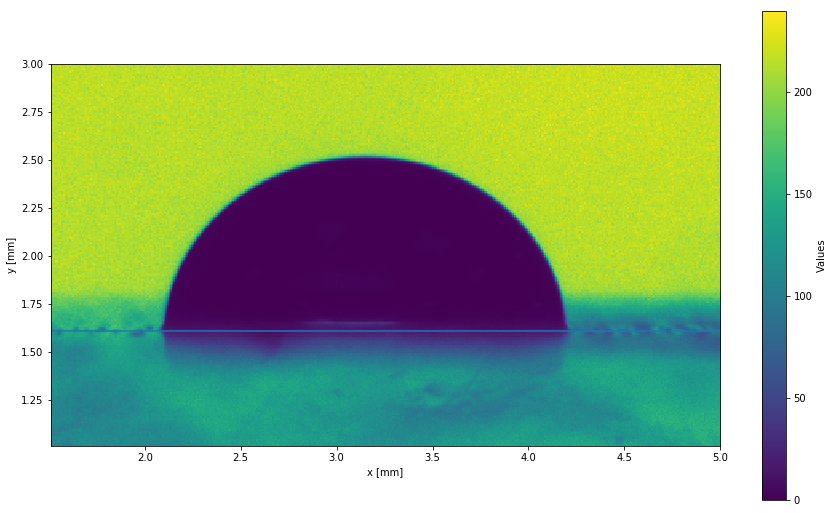

In [13]:
im.crop(intervx=[1.5, 5], intervy=[1, 3], inplace=True)

# Display
plt.figure()
im.display()
plt.show()

## Setting the baseline

pyDSA provides an interactive function `im.choose_baseline()` to interactively set the baseline.
It will display the drop image and ask you to put baseline points by clicking on the image.

Here, we are gonna use the non-interactive function `im.set_baseline()` to set the baseline.

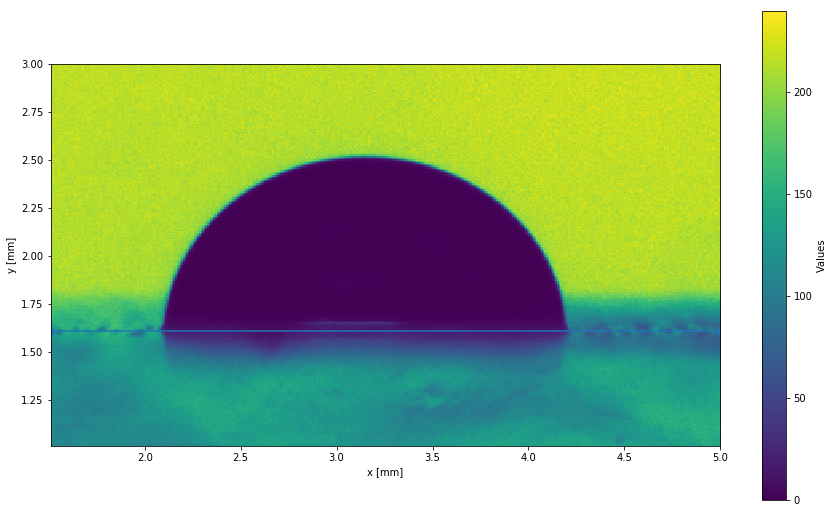

In [14]:
im.set_baseline(pt1=[2, 1.61], pt2=[4.5, 1.61])

# Display
plt.figure()
im.display()
plt.show()

The baseline is automatically displayed as a blue line on the drop image.

Like the scaling, the baseline position is stored in the `.info` file, and automatically loaded.

## Detecting the edges

The drop edge is detected using the [Canny edge detection](https://en.wikipedia.org/wiki/Canny_edge_detector) algorithm from OpenCV.

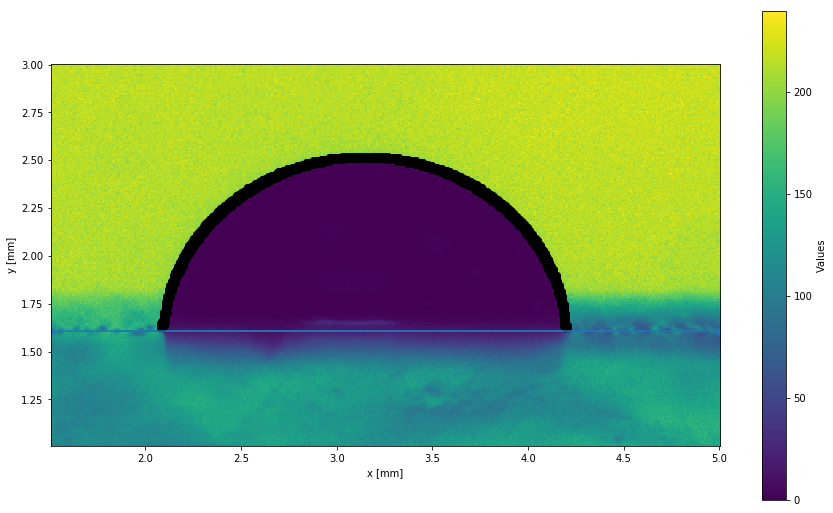

In [15]:
edge = im.edge_detection()

# Display the edge
plt.figure()
im.display()
edge.display()
plt.show()

If the edge detection is not good enough, the `edge_detection` function provides several optional arguments that can help you get the edges you want.
Please refer to the inline documentation of this function if you want to know more about this.

Another method, that detects the edges from contour map is also available:

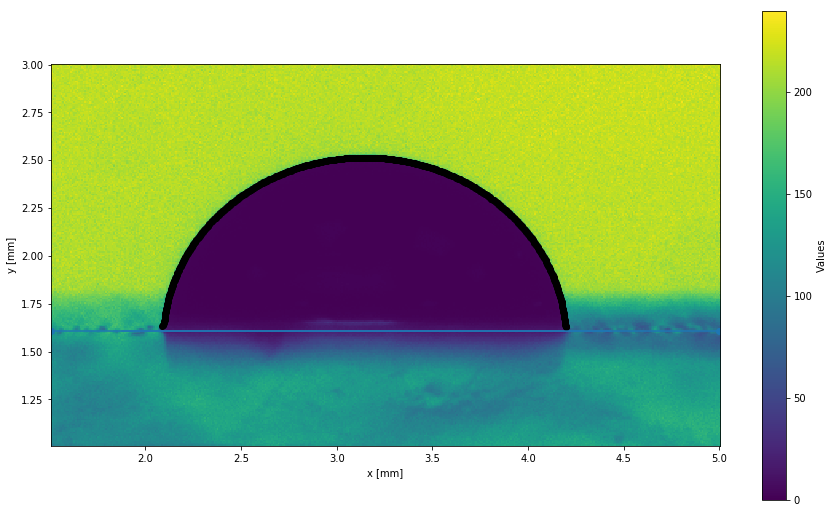

In [16]:
edge_cont = im.edge_detection_contour(level=.25)

# Display the edge
plt.figure()
im.display()
edge_cont.display()
plt.show()

## Fitting the edge

Computing the contact angles will necessitates the edges to be fitted by a curve of some kind. 
pyDSA provide several ways of doing that, depending if you are studying a drop on a dry surface:

- Circle fitting
- Ellipse fitting
- Polynomial fitting
- Spline fitting

or a drop on a lubricated surface:
- Polynomial fitting
- Spline fitting
- Circles fitting


### Circle fitting

The drop edges are fitted with a circle. This solution is only usable for small drop deposited on surfaces.

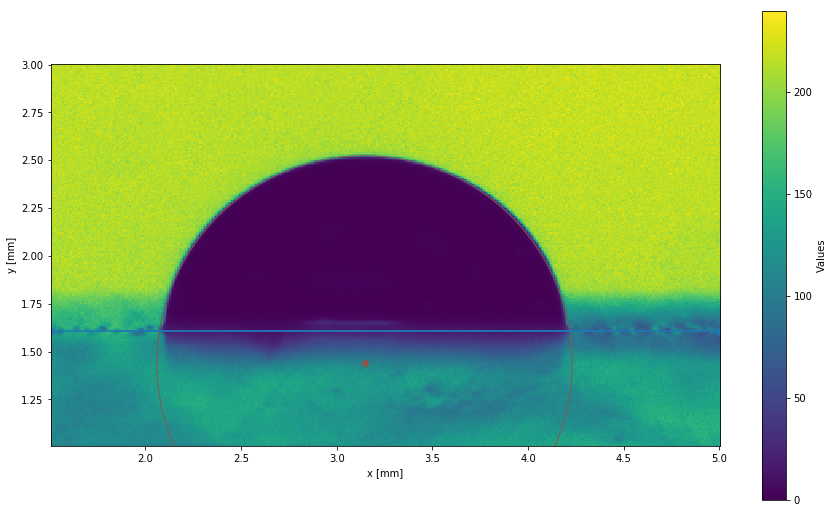

In [17]:
cfit = edge.fit_circle()

# Display the edge
plt.figure()
im.display()
cfit.display()
plt.show()

### Ellipse fitting
The drop edges are fitted with an ellipse. This solution is generally good, as soon as the drop is on a dry surface. It also generally gives less scattered contact angles than the spline fitting.


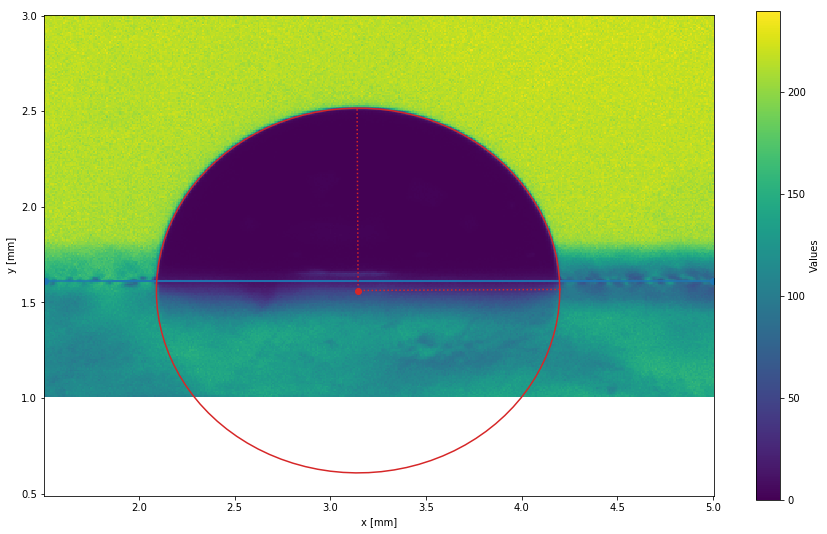

In [18]:
elfit = edge.fit_ellipse()

# Display the edge
plt.figure()
im.display()
elfit.display()
plt.show()

### Polynomial fitting

Fit the drop edges with a polynomial of the wanted degree (default is 3). 
Low degrees are particularly fitted for drops on dry surfaces, but that cannot be properly fitted with a circle or an ellipse.
High degrees can be used for drops on SLIPS surfaces.

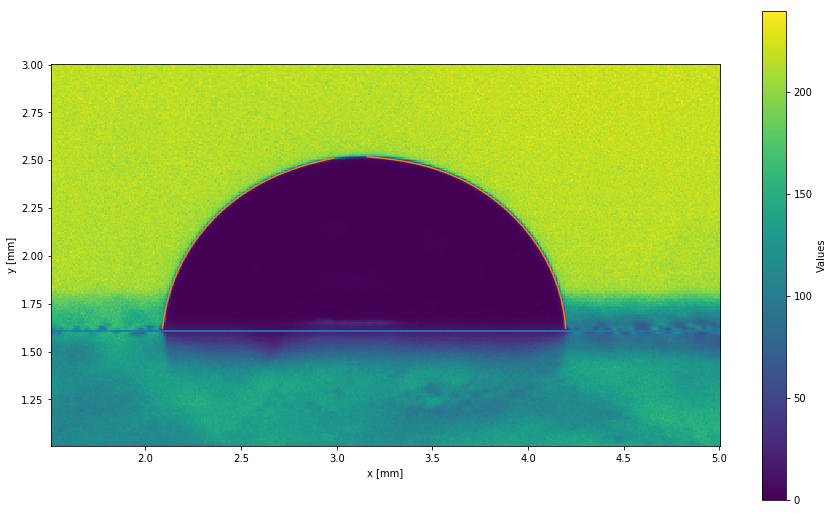

In [19]:
pfit = edge.fit_polyline(deg=5)

# Display the edge
plt.figure()
im.display()
pfit.display()
plt.show()

### Spline fitting

The drop edges are fitted with two splines. This solution is relatively generic and should work for any kind of drops.

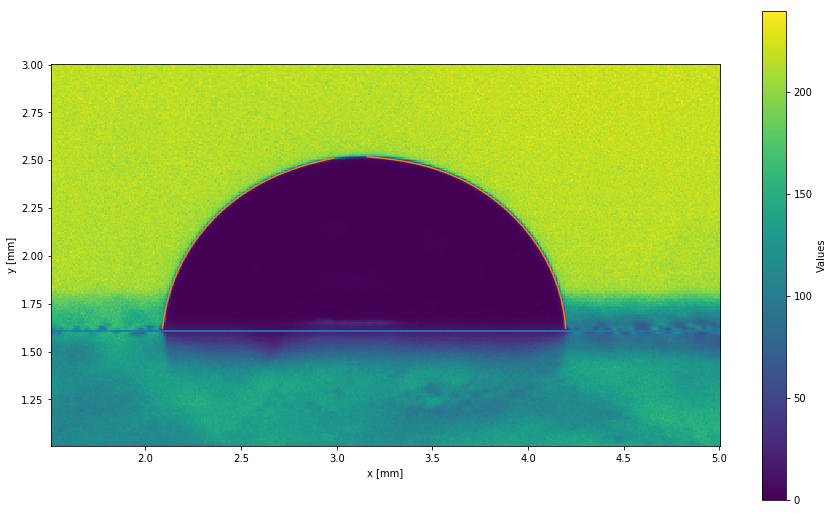

In [20]:
sfit = edge.fit_spline()

# Display the edge
plt.figure()
im.display()
sfit.display()
plt.show()

The edge fitting is displayed in orange.

Spline fittings allow to detect the position of the triple point if present, using the `sfit.detect_triple_points()`.


### Multiple circles fitting
This method fits three circles to the drop edges: one for the drop and two for the wetting ridges. This method is only valid for drops on lubricated surfaces.

As the present image does not present well-defined wetting ridges, the follwing result is just provided as an illustration.

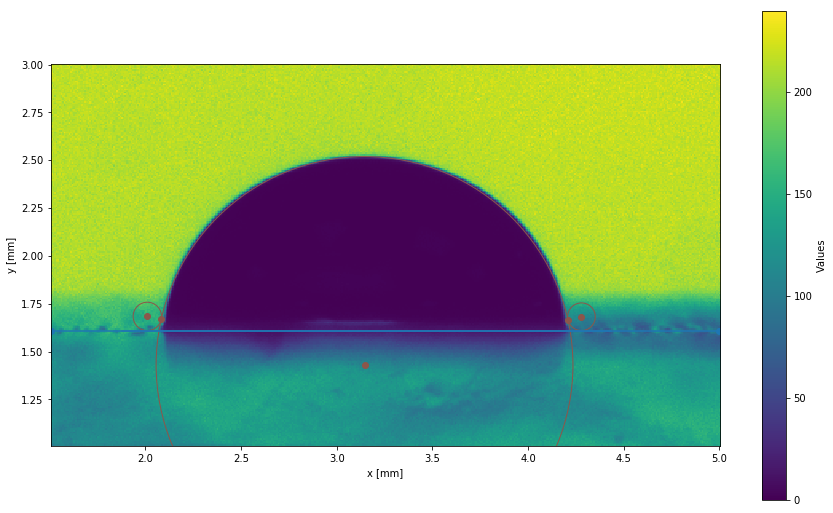

In [21]:
csfit = edge_cont.fit_circles(triple_pts=[[2.1, 1.7], [4.2, 1.7]])

# Display the edge
plt.figure()
im.display()
csfit.display()
plt.show()

## Computing the contact angles

Any of the previously presented fitting can be used to compute the contact angles of the drop.
If a triple point is present, the contact angles at the triple points are also computed.

Contact angles: [86.7804831  93.08146878]


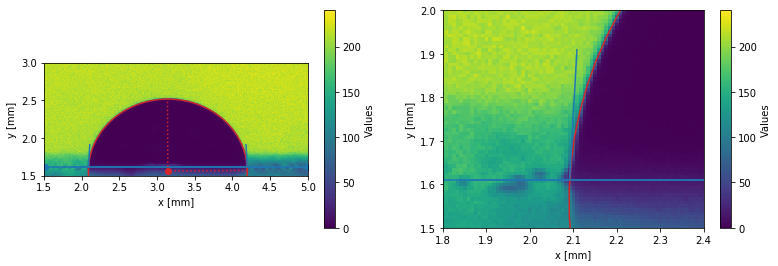

In [22]:
elfit.compute_contact_angle()
print('Contact angles: {}'.format(elfit.thetas))

# Display the edge
fig, axs = plt.subplots(1, 2, figsize=(13, 4))
plt.sca(axs[0])
im.display()
elfit.display()
plt.ylim(1.5, 3)
# Zoom
plt.sca(axs[1])
im.display()
elfit.display()
plt.ylim(1.5, 2)
plt.xlim(1.8, 2.4)
plt.show()

# Dealing with videos

pyDSA can directly import videos and automatically analyze them in batch.
This is the subject of the tutorial available [here](../pydsa_video/index.html).


# How does it works ?

If you want to know more about how pyDSA works, you can take a look at the [drop shape analysis tutorial](../image-analysis/index.html), or go through the code (on your machine, or [here](https://github.com/gabylaunay/pyDSA)).